# K Means Clustering Algorithms Implementation

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import make_blobs
%matplotlib inline

In [18]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [19]:
X

array([[ -1.19252967,  -2.50861697],
       [ -9.22866066, -10.57458002],
       [ -0.42042582,  -3.270509  ],
       ...,
       [-11.18511773,  -9.22072452],
       [ -2.89330097,  -2.39869904],
       [ -8.41920031,  -9.94081022]])

In [20]:
y[:5] # y is not being used as its unsupervised machine learning and clustering is done for X only 

array([0, 1, 0, 0, 0])

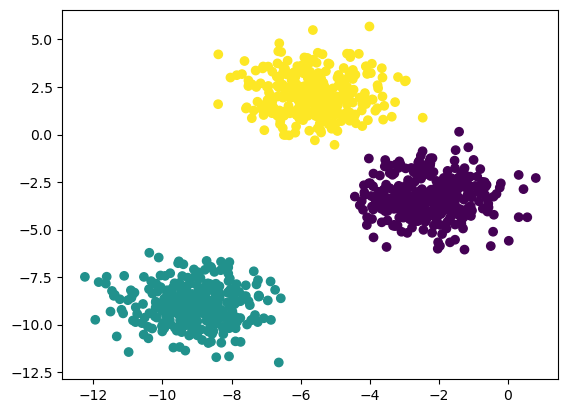

In [21]:
plt.scatter(X[:,0],X[:,1],c=y)

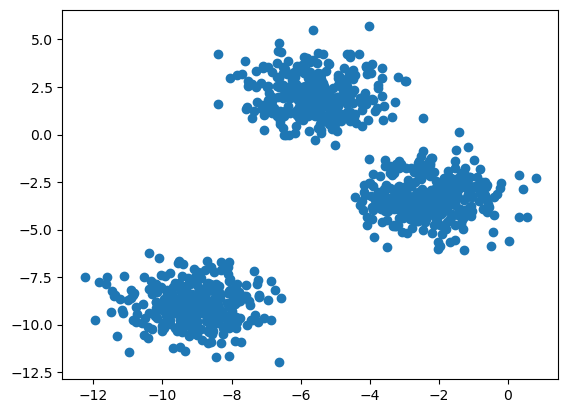

In [24]:
plt.scatter(X[:,0],X[:,1])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
from sklearn.cluster import KMeans

In [30]:
## Elbow Method to select the K value (Sum of squares will be used)
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [31]:
wcss

[20220.868699154995,
 5943.17418462427,
 1383.30538179168,
 1219.3895004766255,
 1061.7835721364083,
 906.1922514366362,
 811.4612666420364,
 717.7511753792534,
 626.4649191799203,
 573.2605329039842]

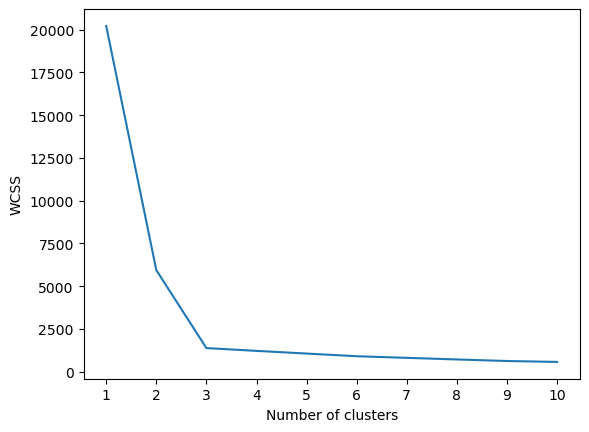

In [32]:
## Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [35]:
y_label=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


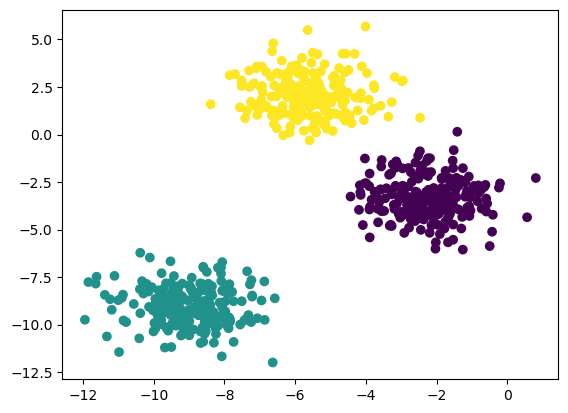

In [37]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [41]:
## Knee Locator 
!pip install kneed

In [45]:
from kneed import KneeLocator

In [48]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [49]:
## Silhoutte Score 
from sklearn.metrics import silhouette_score

In [52]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [53]:
silhouette_coefficients

[0.664700096349866,
 0.7424328219979442,
 0.5931156292523111,
 0.4742826862497005,
 0.32361302223790683,
 0.3332679867898483,
 0.33806040137427096,
 0.32834950139081703,
 0.33436480915248407]

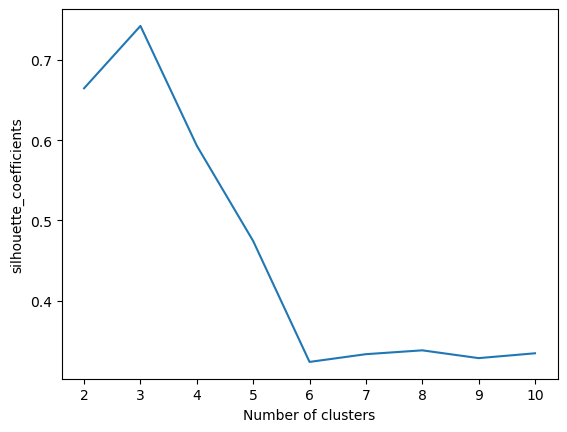

In [55]:
## Plotting Silsilhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show() # K=3 is the best value 